In [1]:
# Import local bentoml repository
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
import bentoml

print(bentoml.__file__)

/Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml/__init__.py


# Train your classification model

In [4]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


## Import the Fashion MNIST dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

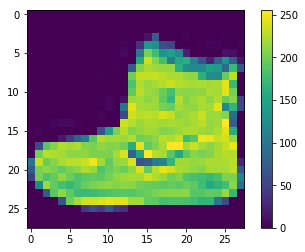

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

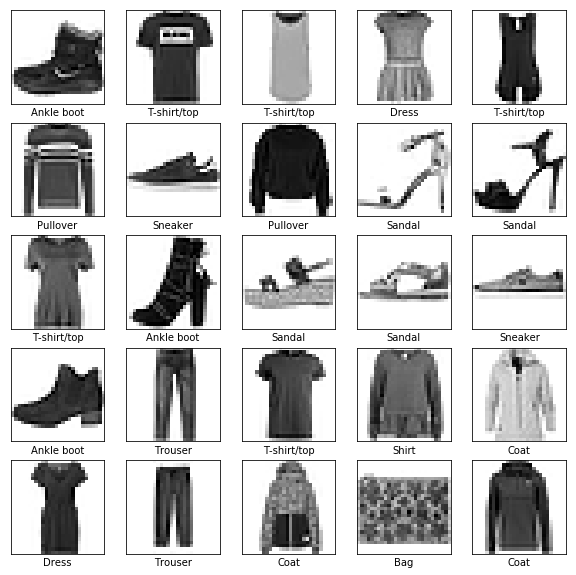

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have parameters that are learned during training.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5030 - acc: 0.8240
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3753 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3382 - acc: 0.8744
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3127 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2939 - acc: 0.8910


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.3458 - acc: 0.8745
Test accuracy: 0.8745


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. Overfitting is when a machine learning model performs worse on new data than on their training data. 

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [19]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([2.7408589e-06, 4.5672898e-08, 7.3505056e-08, 5.7312954e-09,
       1.3179843e-07, 8.6629428e-03, 7.1223747e-07, 1.7688565e-02,
       2.3723640e-06, 9.7364241e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or `class_names[9]`. And we can check the test label to see this is correct:

In [22]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

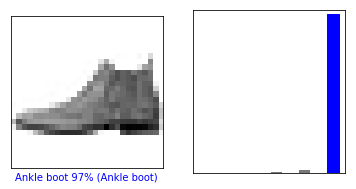

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

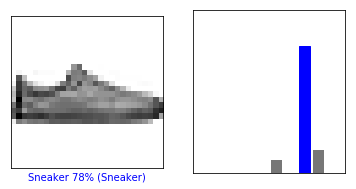

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

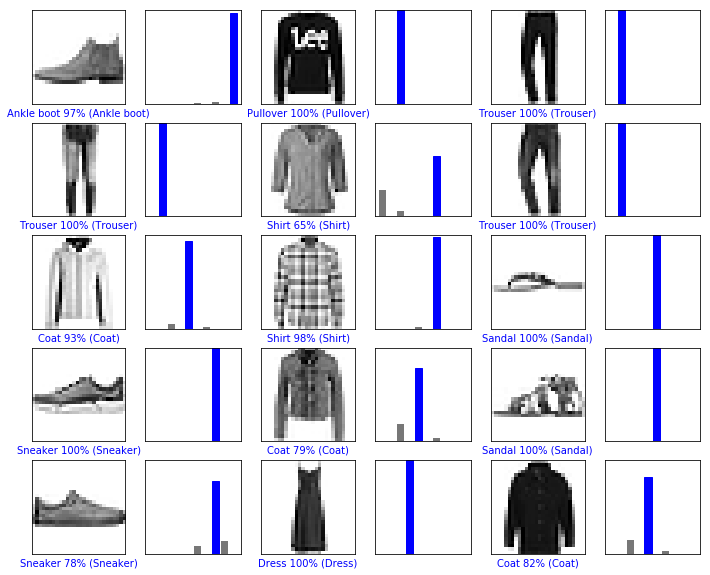

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image. 

In [27]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.7408614e-06 4.5672724e-08 7.3505056e-08 5.7313065e-09 1.3179843e-07
  8.6629428e-03 7.1223815e-07 1.7688565e-02 2.3723617e-06 9.7364241e-01]]


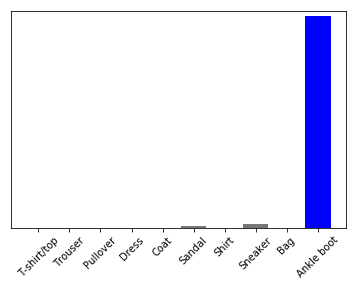

In [30]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
prediction_result = np.argmax(predictions_single[0])
print(type(img))
print(type(prediction_result))
print(prediction_result)

<class 'numpy.ndarray'>
<class 'numpy.int64'>
9


And, as before, the model predicts a label of 9.

# BentoML example

## Export model

In [38]:
%%writefile tf_keras_fashion_mnist.py

from bentoml import api, artifacts, env, BentoService
from bentoml.artifact import TfKerasModelArtifact
from bentoml.handlers import TensorflowTensorHandler

@bentoml.env(conda_dependencies=['tensorflow', 'numpy'])
@bentoml.artifacts([TfKerasModelArtifact('classifier')])
class TfKerasFashionMnistModel(bentoml.BentoService):
    
    @bentoml.api(TensorflowTensorHandler)
    def predict(self, ndArray):
        # print(self.artifacts)
        result = self.artifacts.classifier.predict(ndArray)
        return result



Overwriting tf_keras_fashion_mnist.py


## Save model

In [39]:
from tf_keras_fashion_mnist import TfKerasFashionMnistModel

bento_model = TfKerasFashionMnistModel.pack(classifier=model)
saved_path = bento_model.save('/tmp/bento')
print(saved_path)

module name and module are bentoml Module('bentoml', '/Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml/__init__.py', ['/Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml'])
module file location is /Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml/__init__.py
module name and module are bentoml.handlers Module('bentoml.handlers', '/Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml/handlers/__init__.py', ['/Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml/handlers'])
module file location is /Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml/handlers/__init__.py
module name and module are bentoml.handlers.base_handlers Module('bentoml.handlers.base_handlers', '/Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml/handlers/base_handlers.py')
module file location is /Users/bozhaoyu/src/bento/examples/tf-keras-fashion-mnist/../../bentoml/handlers/

## Load model from archive

In [40]:
loaded_model = bentoml.load(saved_path)
loaded_model.predict(img)

{'classifier': <bentoml.artifact.tf_keras_model_artifact._TfKerasModelArtifactInstance object at 0x12a575b70>}


array([[2.7408614e-06, 4.5672724e-08, 7.3505056e-08, 5.7313065e-09,
        1.3179843e-07, 8.6629428e-03, 7.1223815e-07, 1.7688565e-02,
        2.3723617e-06, 9.7364241e-01]], dtype=float32)

__* For demo purpurse, copy generated model to ./model folder__

In [ ]:
import os
import shutil
shutil.rmtree('./model', ignore_errors=True)
shutil.copytree(saved_path, './model')

## Install model archive as python module

In [ ]:
!pip install ./model

In [ ]:
# Your bentoML model class name will become packaged name
from TfKerasFashionMnistModel import TfKerasFashionMnistModel

ms = TfKerasFashionMnistModel().load() # call load to ensure all artifacts are loaded
ms.predict(img)

## Build API server docker image

In [ ]:
!cd "./model" && docker build -t atalaya/sentiment-lr-model .